# Coleta de Dados do Twitter

In [1]:
# Biblioteca
import tweepy
import sys

# Análise de Polaridade (Sentimento)

In [2]:
# Autenticação
consumer_key = 'vWHPKgD7DSSbWoeZbfaAJy84d'
consumer_secret = 'G6hJlHNeijyiNdBcTIv48yDqfxPTsnh4XaMey70Tp6YDvvI2oO'
access_token = '29254235-X4AyN2Fir3jKANAjTZejtYlQDVP6E973kQnJh7Aqv'
access_token_secret = '3Il7sO4PTQnBjsrsM3w5hRlszS8EZCG3LbtwOQghJER7r'

In [3]:
# Criação do token de autenticação
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

token = tweepy.API(auth)

## Busca por palavra-chave

In [4]:
# Definição da palavra que será pesquisada no Twitter
keyword = ("bolsonaro")

In [5]:
# Busca por palavras-chave
tweets = token.search(q = keyword, count = 20, result_types = 'mixed')

# por default, "count = 100". O valor máximo de count é 18000
# "Lang = pt" => utilizado quando eu quiser somente tweets em português

**Observação**

Fazer busca por palavra chave, busca o text do tweet truncado.
* tweets = token.search(q = keyword, lang = pt)

Fazer busca por palavra chave, busca o text do tweet por inteiro.
*  tweets = token.search(q = keyword, tweet_mode = 'extended')

In [6]:
# Verificação da quantidade de tweets coletado
print("Total de tweets coletados %s." % (len(tweets)))

Total de tweets coletados 20.


In [7]:
# Impreesão do nome do usuário (*screen_name*) e o texto do tweet
for tweet in tweets:
    print("Usuário: %s" % {tweet.user.screen_name})
    print("Tweet: %s" % {tweet.text})

Usuário: {'joquari'}
Tweet: {'RT @kimpaim: Tamo junto Bolsonaro! https://t.co/0NeAeInP8o'}
Usuário: {'FabioCa65820621'}
Tweet: {'RT @Hedilbe49136857: Arthur Lira disse que 95% dos pedidos de impechments contra o Presidente Bolsonaro sequer deveriam ser apresentados, p…'}
Usuário: {'namkookult'}
Tweet: {'meu deus o assalto kk eu odeio o bolsonaro https://t.co/8rdbIZAJDb'}
Usuário: {'amadeuasf'}
Tweet: {'RT @M0R02022: Já faz mais de um ano que comecei a listar as traições de Bolsonaro. De lá até aqui, a lista cresceu sem parar, e hoje ela es…'}
Usuário: {'Haueh9'}
Tweet: {'RT @ThiagoResiste: @felipeneto Enquanto eles ladram a gente trabalha. Carro de som no interior da Bahia denunciando os crimes de Bolsonaro!…'}
Usuário: {'Washingtonerivi'}
Tweet: {'RT @sergiodireita1: A jornalista Thaís Oyama testemunhou, perplexa, o crescimento de Bolsonaro na campanha. Não entendeu nada e continua se…'}
Usuário: {'hey_CAMRENisRea'}
Tweet: {'RT @felipeneto: O resultado de pesquisas realizadas por part

## Análise de Polaridade

Para fazer a análise de polaridade é utilizada a função *sentiment.polarity* do pacote *TextBlob*

In [ ]:
# Pacotes
from textblob import TextBlob as tb
import numpy as np

In [ ]:
# Variável que armazena as polaridades
analysis = None

In [ ]:
# Lista vazia para armazenar scores
tweets_score = []

In [ ]:
for tweet in tweets:
    print('**', tweet.text)
    analysis = tb(tweet.text)
    polarity = analysis.sentiment.polarity
    tweets_score.append(polarity)
    # para cada vez que for calculada a polaridade a mesma será adicionada ao vetor de polaridade

** RT @QuebrandoOTabu: É muito louco pensar que uma galera votou em Bolsonaro por ele ser "cidadão de bem", defensor da moral e bons costumes.…
** @BolsonaroSP Filha de brasileira e alemão, Juliana Wimmer é candidata a deputada pelo Partido Verde. Ela vê o popul… https://t.co/3vyant1hU9
** RT @TheInterceptBr: 🗣QUEM É O CARA DA CASA DE VIDRO? Grampos realizados após a morte do miliciano Adriano da Nóbrega mostram o contato de s…
** @1desocupada2 eu sou assim kkkkkkkkk tudo que acontece de ruim eu penso "nossa, mas se não fosse o bolsonaro"
** RT @lumendes50: Bolsonaro não tem a menor noção de como funcionam as instituições, tem síndrome de reizinho, mas pior que ele são as forças…
** RT @diguinhocoruja: Você que viu Bolsonaro dando uma de tiozão divertido na Rede TV, não caia nesse conto. Lembre-se que esse sujeito comet…
** RT @DeputadoFederal: Grampos sugerem que comparsas do miliciano Adriano da Nóbrega recorreram a Bolsonaro https://t.co/ss61UIyVWr
** O 🕳 é mais embaixo.
Era melhor 

In [ ]:
print('Vetor de Polaridade:', tweets_score)

Vetor de Polaridade: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0]


In [ ]:
print('Média de sentimento:' + str(np.mean(tweets_score)))

Média de sentimento:0.005


In [ ]:
import csv
import nltk
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
nltk.download('stopwords')



stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to C:\Users\Michelle
[nltk_data]     Note\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


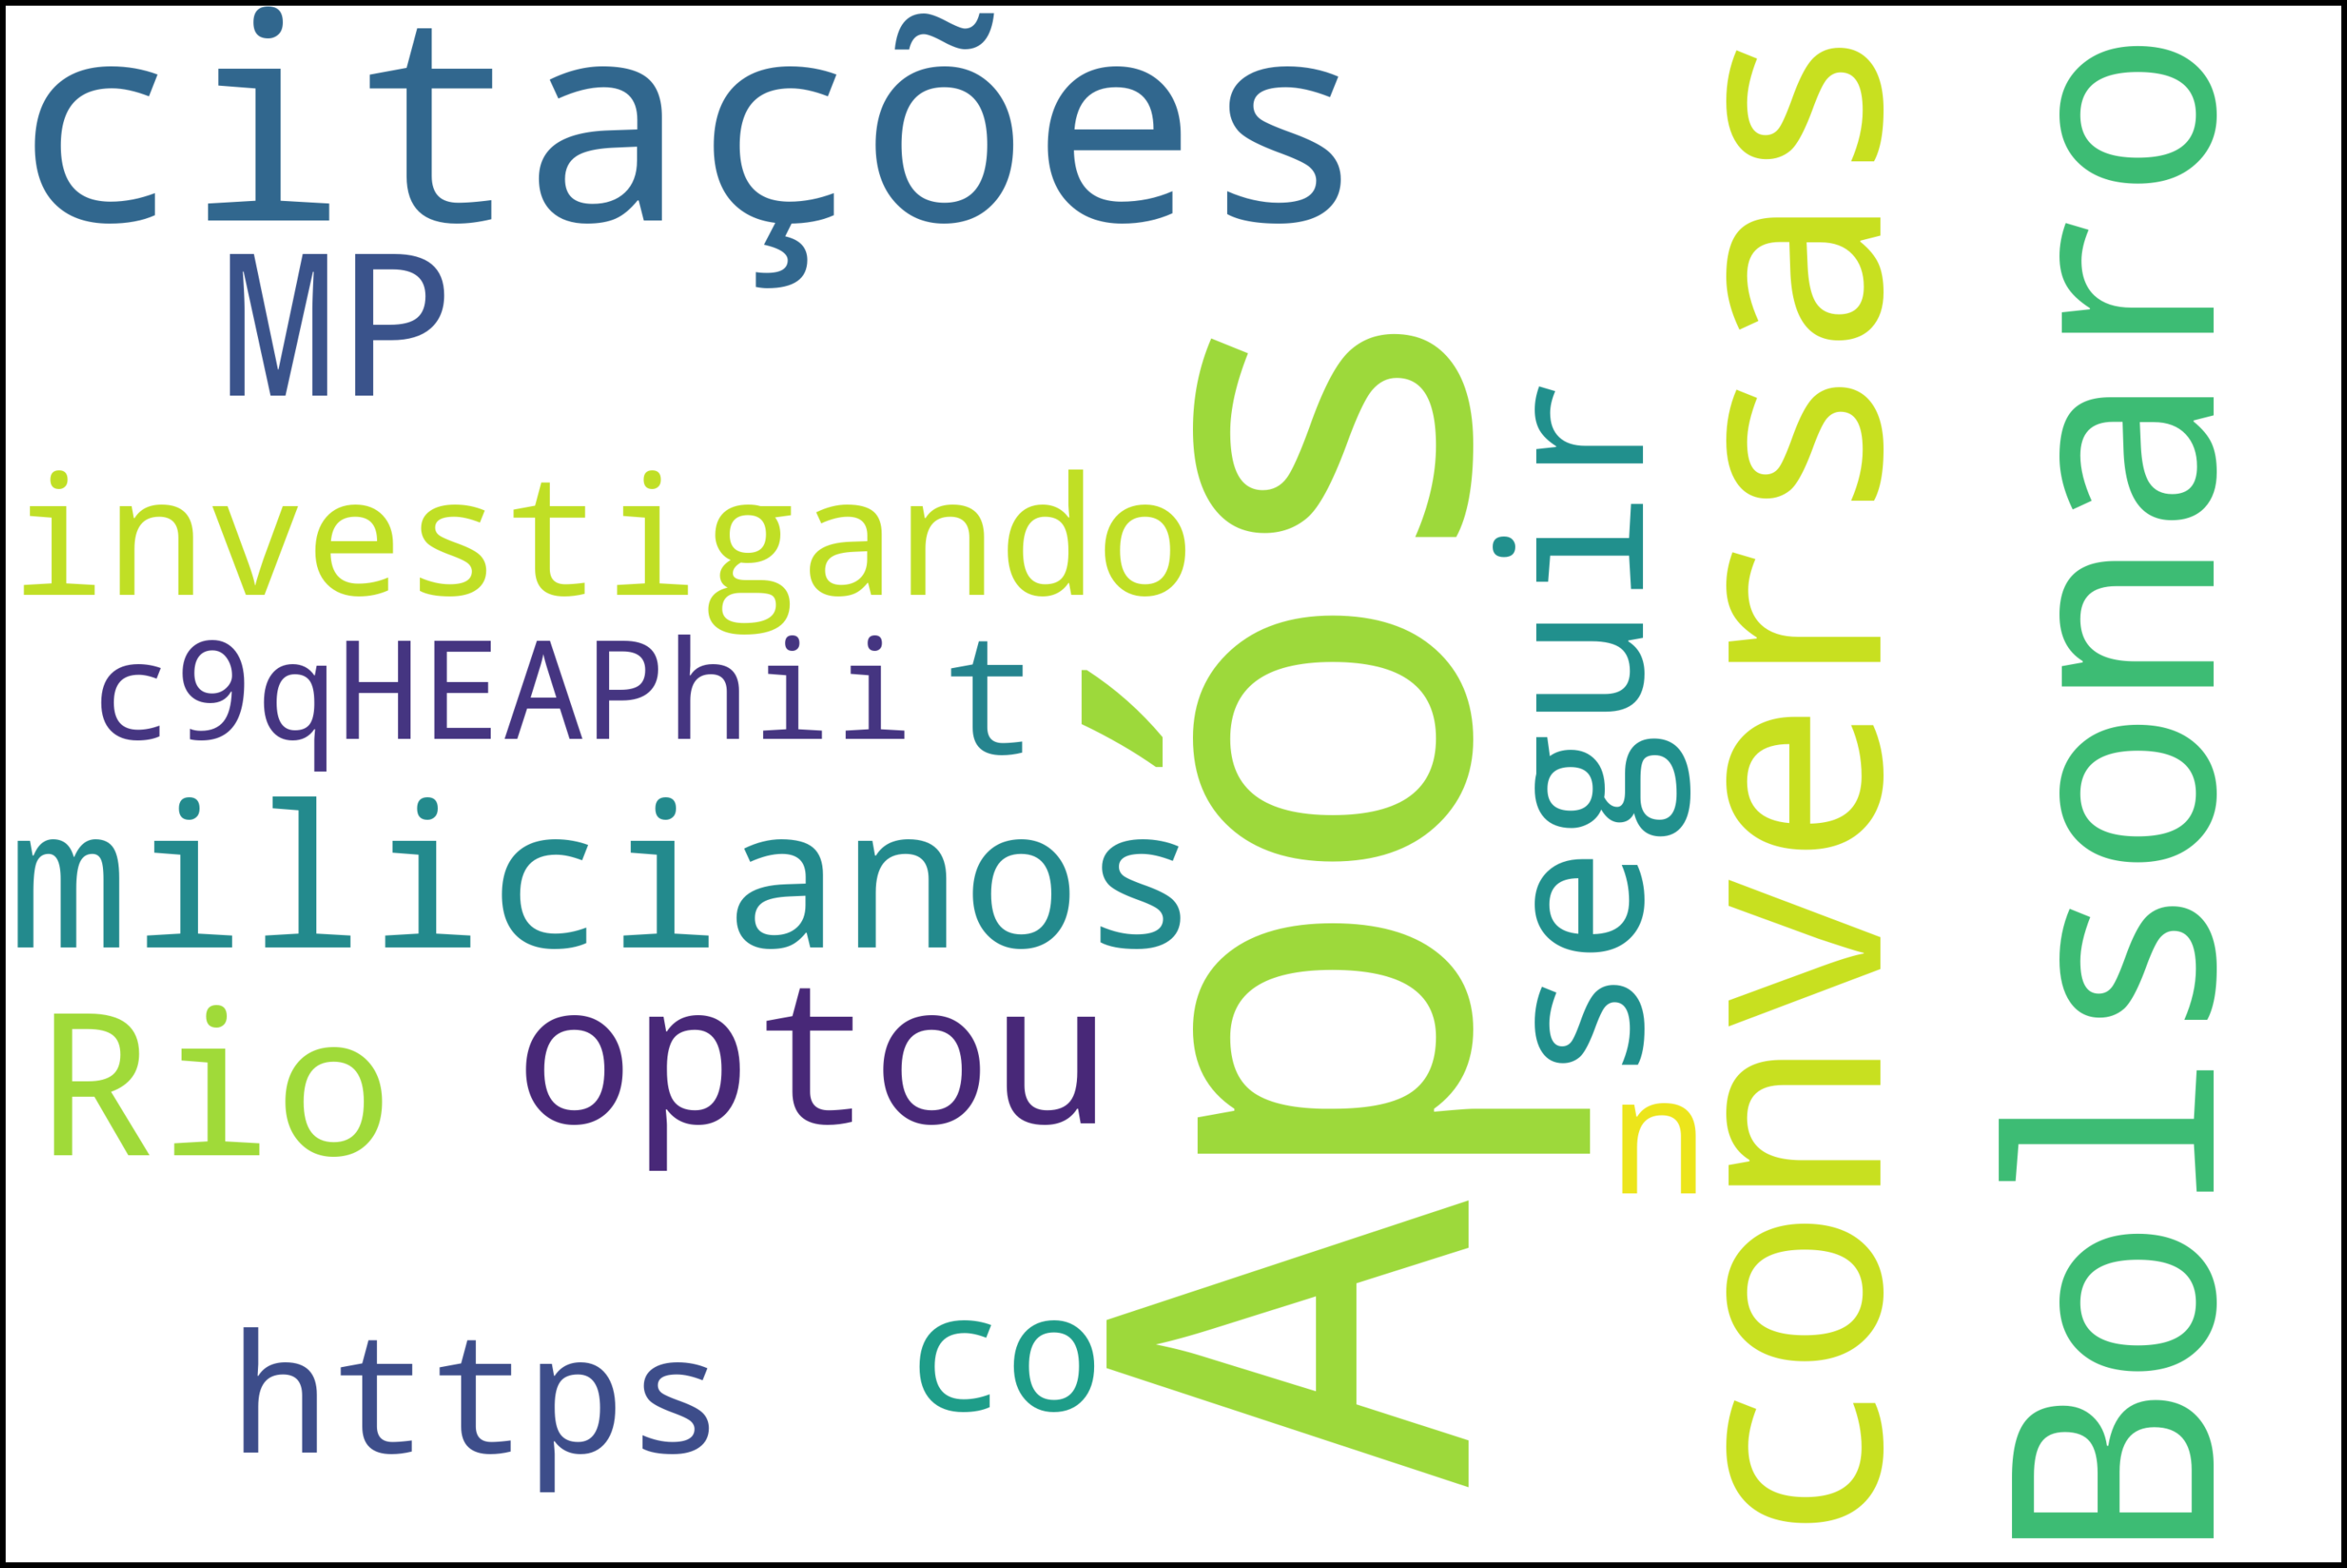

In [ ]:
text= tweet.text
#text = tokenized_text(tweet.text)

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Armazenamento dos tweets coletados

In [ ]:
# Biblioteca
import json
import pandas as pd

In [ ]:
status = tweets[0]

# Conversão para string
json_str = json.dumps(status._json)

# Deserialização de uma string para um objeto python
parsed = json.loads(json_str)

In [ ]:
type(tweets)

tweepy.models.SearchResults

In [ ]:
type(json_str)

str

In [ ]:
type(parsed)

dict

In [ ]:
dfTweets = pd.DataFrame.from_dict(parsed)

In [ ]:
dfTweets.head()
dfTweets.to_csv("exporttwitter.csv", index=False)